In [8]:
import import_ipynb
from astar import astar
import Graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import networkx as nx

In [9]:
nodes = pd.read_csv("./roadnetwork_data/nodes.csv")
links = pd.read_csv("./roadnetwork_data/links.csv")

In [10]:
links

,link_id,begin_node_id,end_node_id,begin_angle,end_angle,street_length,osm_name,osm_class,osm_way_id,startX,startY,endX,endY,osm_changeset,birth_timestamp,death_timestamp
0,1,103235840,103225947,-161.51,16.99,84.295,PalisadeAvenue,tertiary,223694294,-74.021807,40.884127,-74.021994,40.883384,16353009,1405267167641,40000000000000
1,2,42516422,42516427,175.46,-4.68,260.392,SchenectadyAvenue,residential,5679907,-73.932264,40.641950,-73.932013,40.639616,19443546,1405267167641,40000000000000
2,3,42516422,42516418,-4.60,175.40,256.804,SchenectadyAvenue,residential,5679907,-73.932264,40.641950,-73.932509,40.644252,19443546,1405267167641,40000000000000
3,4,103235530,103235525,-103.43,82.40,76.107,HarristownRoad,tertiary,11580026,-74.142573,40.948839,-74.143464,40.948718,14802365,1405267167641,40000000000000
4,5,42762376,42756156,-23.92,156.25,197.829,KingslandAvenue,residential,5698286,-73.844794,40.877882,-73.845749,40.879508,8219326,1405267167641,40000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260850,260851,261439528,261436084,49.48,-127.14,147.437,BaysideDrive,residential,24127585,-73.751098,40.787662,-73.749775,40.788530,14828446,1405267167641,40000000000000
260851,260852,103726540,103742899,25.44,-155.37,102.959,WashingtonStreet,primary,132500931,-74.171199,40.742796,-74.170682,40.743635,20340192,1405267167641,40000000000000
260852,260853,103874418,103877267,-154.78,24.95,244.350,NewYorkAvenue,tertiary,26446612,-74.042926,40.747802,-74.044162,40.745814,9498058,1405267167641,40000000000000
260853,260854,42912380,42824667,-110.12,70.19,80.718,HillsideAvenue,primary,46420806,-73.809690,40.705746,-73.810589,40.705496,16026573,1405267167641,40000000000000


In [11]:
nodes

,node_id,is_complete,num_in_links,num_out_links,osm_traffic_controller,xcoord,ycoord,osm_changeset,birth_timestamp,death_timestamp,grid_region_id
0,42467266,t,3,3,NaN,-73.917419,40.660051,3218174,1405267167641,40000000000000,225
1,42467262,t,4,4,NaN,-73.918294,40.659484,3218174,1405267167641,40000000000000,225
2,42467259,t,3,3,NaN,-73.919089,40.658966,3218174,1405267167641,40000000000000,205
3,42467258,t,3,3,NaN,-73.919968,40.658398,3218174,1405267167641,40000000000000,205
4,42467250,t,2,2,NaN,-74.005260,40.600091,7948780,1405267167641,40000000000000,143
...,...,...,...,...,...,...,...,...,...,...,...
95576,42467298,t,3,3,NaN,-73.952824,40.653978,3218174,1405267167641,40000000000000,185
95577,42467294,t,4,3,NaN,-73.956164,40.653777,3218174,1405267167641,40000000000000,185
95578,42467292,t,2,3,NaN,-73.959451,40.653575,3218174,1405267167641,40000000000000,185
95579,42467278,t,3,2,NaN,-73.922112,40.657012,3218174,1405267167641,40000000000000,205


**Find nearest node to given coordinate (longitude, latitude)**

In [12]:
# Find the nearest node given longitude and latitude
def find_nearest_node(x, y):
    min_dist = np.inf
    for i in range(len(nodes)):
        dist = np.sqrt((x - nodes['xcoord'][i])**2 + (y - nodes['ycoord'][i])**2)
        if dist < min_dist:
            min_dist = dist
            idx = i
    return nodes['node_id'][idx]

In [13]:
find_nearest_node(-73.9882,40.7155)

42447428

In [14]:
find_nearest_node(-73.9455,40.8045)

42442117

In [15]:
max_lat = max(nodes['ycoord']); min_lat = min(nodes['ycoord'])
max_lon = max(nodes['xcoord']); min_lon = min(nodes['xcoord'])
print(min_lat, max_lat, min_lon, max_lon)

40.5116616 41.002767 -74.203028 -73.696493


In [16]:
graph = Graph.make_graph('./roadnetwork_data/nodes.csv', './roadnetwork_data/links.csv')

>>> Graph creating time: 15.144203662872314


In [17]:
path, closed_lst = astar(graph, 42447428, 42442117)

[Astar algorithm]
>>> distance cost is: 11745.128000000006
>>> #iteration:  1518
>>> #expanded nodes: 1518
>>> execution time:  0.04440641403198242


**Load manhattan map image**

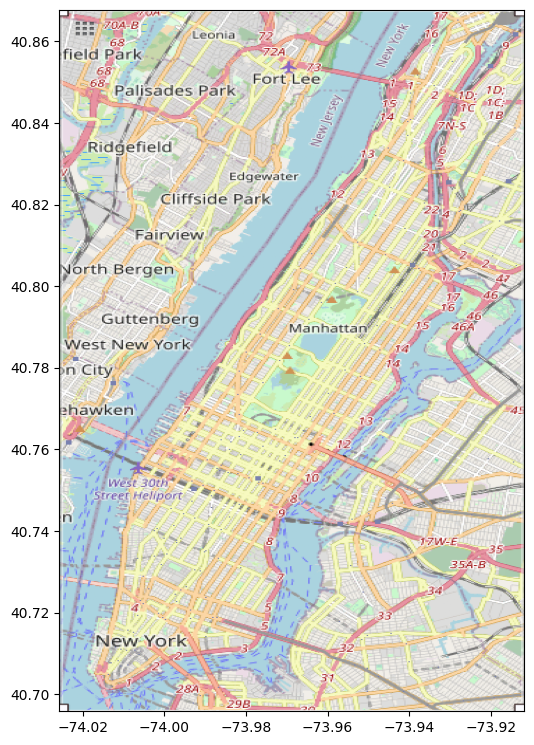

In [18]:
fig, ax =  plt.subplots(figsize=(6,12))
image = img.imread("manhattan.png")
# image = plt.imread("manhattan.png")
bbox = [-74.02574075, -73.911770375, 40.695826125, 40.867713015]
ax.imshow(image, extent=bbox, aspect='equal')
plt.show()

**Make shortest path to graph with network-x module**

In [19]:
# Creating node dictionary
node_dict = {}
for i in range(len(nodes)):
    node_dict[nodes['node_id'][i]] = i

# Creating shortest path graph
graph_path = nx.Graph()
for i in range(len(path)-1):
    graph_path.add_edge(path[i], path[i+1])
    
# Defining position of each node in shortest path
pos = {}
for i in range(len(path)):
    idx = node_dict[path[i]]
    pos[path[i]] = (nodes['xcoord'][idx],nodes['ycoord'][idx])

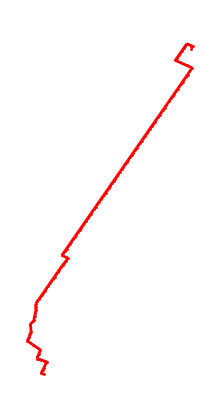

In [20]:
plt.figure(figsize=(2,4))
nx.draw(graph_path, pos, node_size = 1, width=2, node_color='r', edge_color='r')
plt.show()

In [21]:
start = (nodes['xcoord'][node_dict[path[0]]],nodes['ycoord'][node_dict[path[0]]])
end = (nodes['xcoord'][node_dict[path[-1]]],nodes['ycoord'][node_dict[path[-1]]])

**Visualize shortest path on manhattan map**

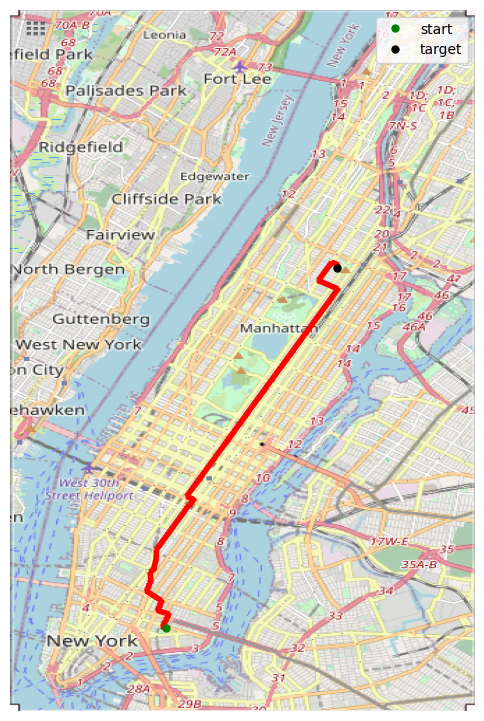

<Figure size 640x480 with 0 Axes>

In [22]:
# Combining Result
fig, ax =  plt.subplots(figsize=(6,12))
image = img.imread("manhattan.png")
bbox = [-74.02574075, -73.911770375, 40.695826125, 40.867713015]
ax.imshow(image, extent=bbox, aspect='equal')
nx.draw(graph_path, pos, node_size = 4, node_color='r', edge_color='r', width=4)
ax.plot(start[0], start[1], 'go', markersize=5, label='start')
# ax.plot(end[0], end[1], marker='o', color='b', markersize=5, label='target')
ax.plot(end[0], end[1], 'ko', markersize=5, label='target')
ax.legend()
plt.show()
plt.savefig("map.png")

**Visualize shortest path and all explored nodes**

In [23]:
# Creating all expanded node graph
exp_nodes = nx.Graph()
exp_pos = {}
for i in closed_lst:
    exp_nodes.add_node(i.id)
    exp_pos[i.id] = (i.lon, i.lat)

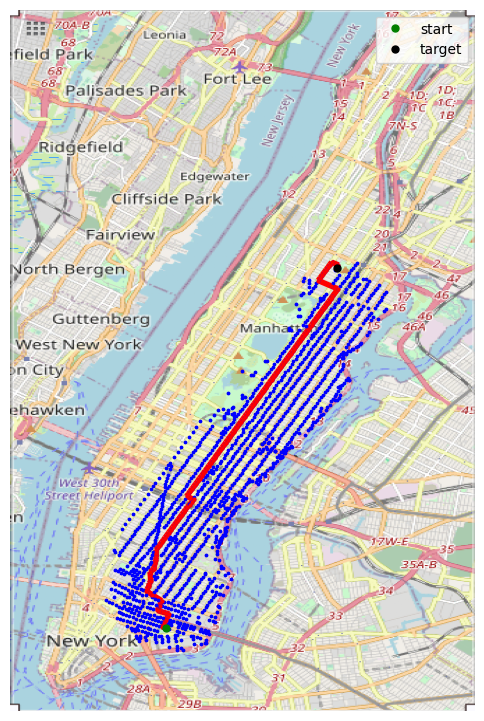

In [24]:
# Combining Result
fig, ax =  plt.subplots(figsize=(6,12))
image = img.imread("manhattan.png")
bbox = [-74.02574075, -73.911770375, 40.695826125, 40.867713015]
ax.imshow(image, extent=bbox, aspect='equal')
# expanded nodes
nx.draw(exp_nodes, exp_pos, node_size = 3, node_color='b')
# shortest path nodes
nx.draw(graph_path, pos, node_size = 4, node_color='r', edge_color='r', width=4)
ax.plot(start[0], start[1], 'go', markersize=5, label='start')
# ax.plot(end[0], end[1], marker='o', color='b', markersize=5, label='target')
ax.plot(end[0], end[1], 'ko', markersize=5, label='target')
ax.legend()
plt.show()